In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
Purchases-Purchases Daily-Run Date-11/01/2023 - Date Range : 11/01/2022 - 10/31/2023
Columns:

ABC #
Product Description
NDC
Account #
Account Name
Contract Abbrev Name
Customer PO #
Invoice #
Invoice Date
Order Qty
Shipped Qty
Invoice Ext Amt
Total Ext Cost
Invoice Price
DEA Class
GCN
GCN Seq #
Generic Abbrev Desc
Invoice Type Code
Invoice Type Desc
Invoice Month
Invoice Year
Unit Size Qty
Unit Size Code
Unit Strength Qty
Unit Strength Code
Primary Ingredient HIC4 Code
Primary Ingredient HIC4 Desc
Route Desc
FDB Package Size Qty
FDB AWP Wholesale Factor
NIOSH Code
Abbreviated Desc
Wholesale Cost
Supplier Name
AWP

NOTES: Most ordered products per active ingredient
'''

file_path = 'AI_pharma_client_data.xlsx'


df = pd.read_excel(file_path, sheet_name='Results')


unique_count = df['ABC #'].nunique()
unique_count2 = df['Product Description'].nunique()
num_columns = df.shape[1]
product_orders = df.groupby('Product Description')['Order Qty'].sum()
product_cost_orders = df.groupby('Product Description')['Total Ext Cost'].sum()
product_cost_orders_average = df.groupby('Product Description')['Total Ext Cost'].mean()
primary_ingredient_orders = df.groupby('Primary Ingredient HIC4 Desc')['Order Qty'].sum()
most_ordered_product = product_orders.idxmax()
max_quantity_ordered = product_orders.max()
least_ordered_product = product_orders.idxmin()
min_quantity_ordered = product_orders.min()
most_ordered_ingredient = primary_ingredient_orders.idxmax()
max_quantity_ingredient = primary_ingredient_orders.max()
least_ordered_ingredient = primary_ingredient_orders.idxmin()
min_quantity_ingredient = primary_ingredient_orders.min()

top_5_expensive = product_cost_orders_average.nlargest(5)

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
product_order_info = df.groupby('Product Description')['Invoice Date'].agg(['nunique', 'max', 'min'])
product_order_info['TimeRange'] = (product_order_info['max'] - product_order_info['min']).dt.days
product_order_info_filtered = product_order_info[product_order_info['nunique'] > 1]
average_time_to_order = product_order_info_filtered['TimeRange'].mean()

print(f'Number of unique items (ABC #): {unique_count}')
print(f'Number of unique items (Product Description): {unique_count2}')
print(f'Number of dimensions: {num_columns}')
print(f'The most ordered product is {most_ordered_product} with a total of {max_quantity_ordered} units ordered.')
print(f'The least ordered product is {least_ordered_product} with a total of {min_quantity_ordered} units ordered.')
print(f'The most ordered ingredient is {most_ordered_ingredient} with a total of {max_quantity_ingredient} units ordered.')
print(f'The least ordered ingredient is {least_ordered_ingredient} with a total of {min_quantity_ingredient} units ordered.')
print(f'The most spent on a drug is ${product_cost_orders.max()} which is {product_cost_orders.idxmax()}.')
print(f'The least spent on a drug is ${product_cost_orders.min()} which is {product_cost_orders.idxmin()}.')
print(f'Top 5 most expensive drugs (average cost): {top_5_expensive}')
print(f'The least spent on a drug (average cost) is ${product_cost_orders_average.min()} which is {product_cost_orders_average.idxmin()}.')
print(f'The average time it takes to order each product (excluding products with one order date) is {average_time_to_order:.2f} days.')
print('Quickest moving drugs are', product_order_info_filtered['TimeRange'].nsmallest(5))


Number of unique items (ABC #): 2090
Number of unique items (Product Description): 1976
Number of dimensions: 36
The most ordered product is HEPARIN SOD 5000 UN-ML VL 25X1 ML with a total of 5173 units ordered.
The least ordered product is DEXTROSE-WATER 50% SYG 10X50 ML LFS with a total of -70 units ordered.
The most ordered ingredient is HEPARIN (PORCINE) with a total of 7345 units ordered.
The least ordered ingredient is LEVOCARNITINE with a total of -5 units ordered.
The most spent on a drug is $1543017.0 which is THYMOGLOB DS 25 MG VL.
The least spent on a drug is $-7250.46 which is CM ISS AFTER VEND  CR.
Top 5 most expensive drugs (average cost): Product Description
THYMOGLOB DS 25 MG VL                 51433.900000
VEKLURY 100MG LYPH PWD SDV            23513.360000
DIGIFAB 40 MG VL 1                    22510.895000
GAMMAGARD LIQ 30GM VL 300ML NONRET    20453.367500
PROMACTA 75 MG TAB 30                 19192.808571
Name: Total Ext Cost, dtype: float64
The least spent on a drug (

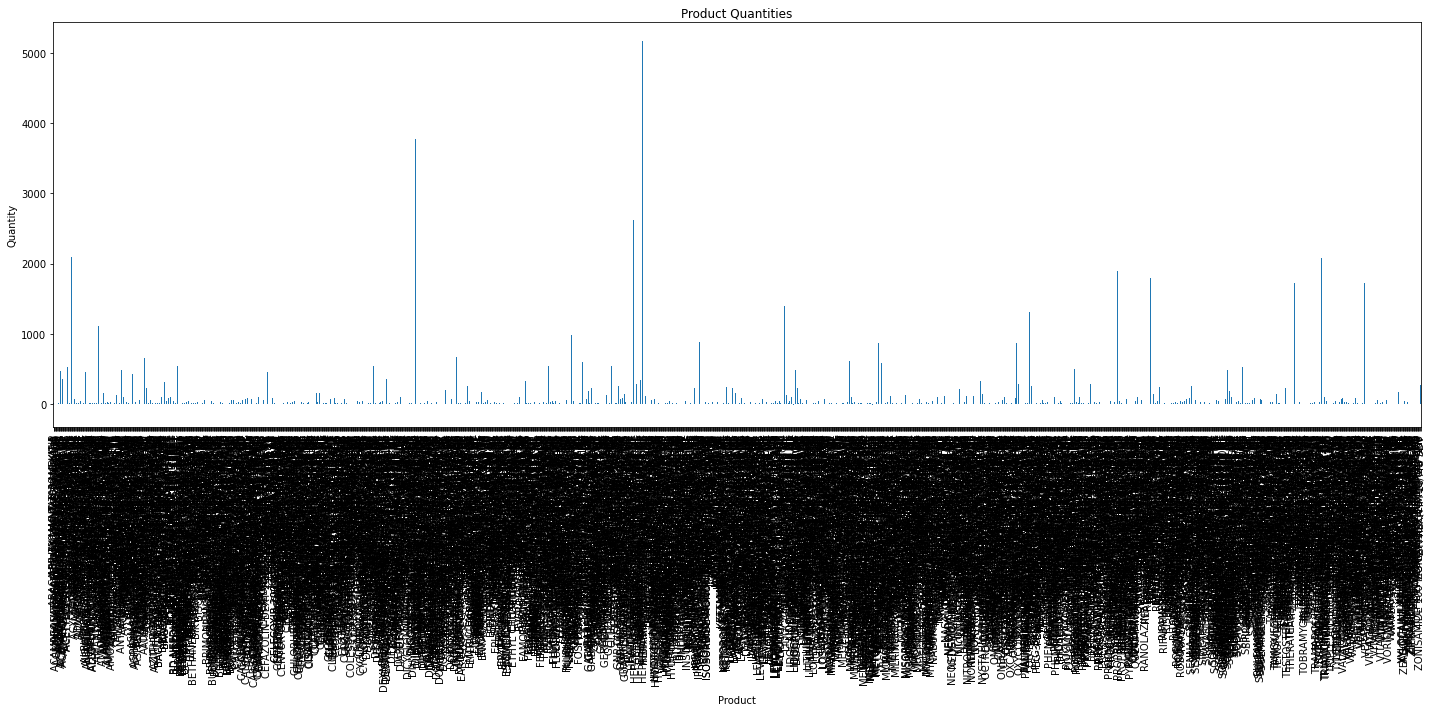

In [101]:
#Drugs wrt their quantities

plt.figure(figsize=(20, 10))
product_orders.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title('Product Quantities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


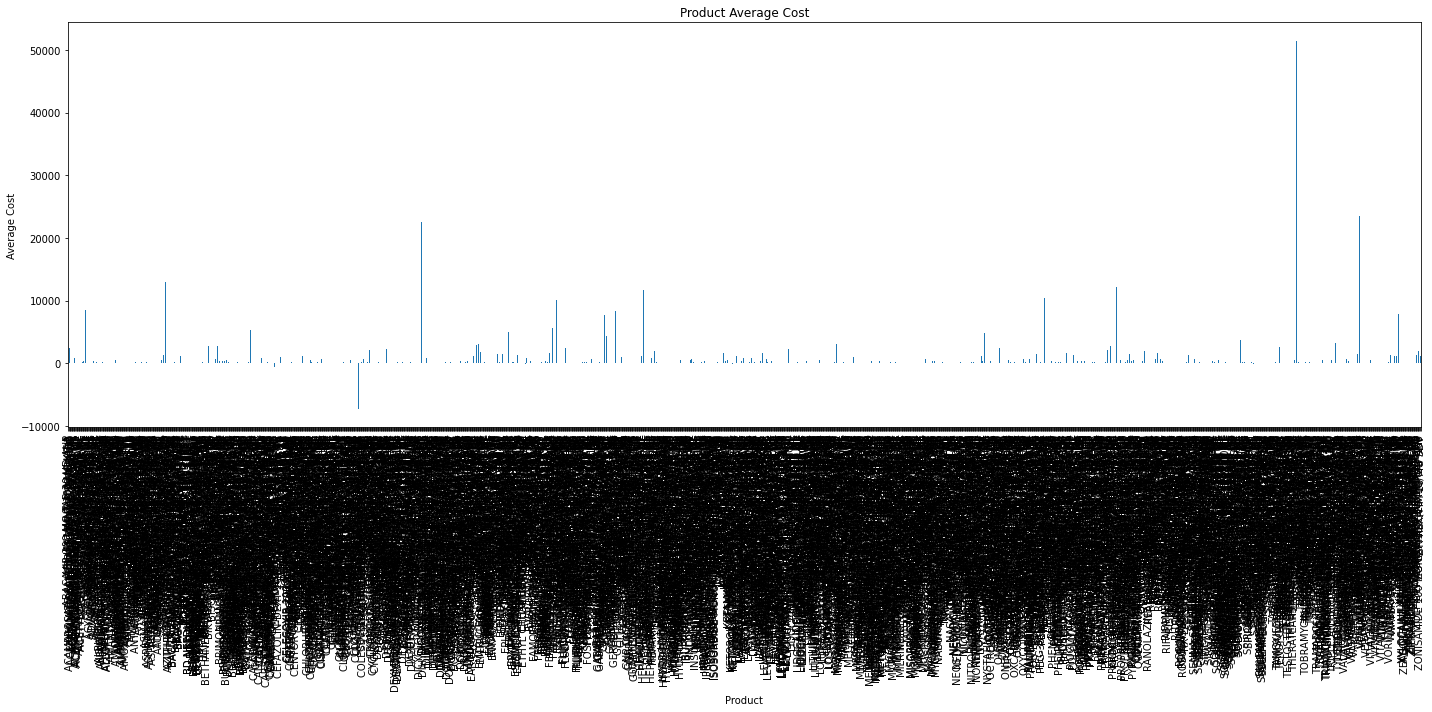

In [102]:
#Drugs wrt their average cost

plt.figure(figsize=(20, 10))
product_cost_orders_average.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Average Cost')
plt.title('Product Average Cost')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [103]:
df.head()

,ABC #,Product Description,NDC,Account #,Account Name,Contract Abbrev Name,Customer PO #,Invoice #,Invoice Date,Order Qty,...,Primary Ingredient HIC4 Code,Primary Ingredient HIC4 Desc,Route Desc,FDB Package Size Qty,FDB AWP Wholesale Factor,NIOSH Code,Abbreviated Desc,Wholesale Cost,Supplier Name,AWP
0,10000203,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,5.167213e+10,100315513,BIDMC WEST GPO,HTPG,0316230016,3126925204,2023-03-17,3,...,P5BB,BETAMETHASONE,TOPICAL,15.0,1.0,NaN,BETAMETH DIP,49.19,TARO PHARMACEUTICALS,61.48
1,10000203,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,5.167213e+10,100315513,BIDMC WEST GPO,HTPG,0417230017,3130367587,2023-04-18,2,...,P5BB,BETAMETHASONE,TOPICAL,15.0,1.0,NaN,BETAMETH DIP,49.19,TARO PHARMACEUTICALS,61.48
2,10000203,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,5.167213e+10,100315513,BIDMC WEST GPO,HTPG,0816230012,3143751772,2023-08-17,3,...,P5BB,BETAMETHASONE,TOPICAL,15.0,1.0,NaN,BETAMETH DIP,49.19,TARO PHARMACEUTICALS,61.48
3,10000203,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,5.167213e+10,100315513,BIDMC WEST GPO,HTPG,0917230011,3147259103,2023-09-18,3,...,P5BB,BETAMETHASONE,TOPICAL,15.0,1.0,NaN,BETAMETH DIP,49.19,TARO PHARMACEUTICALS,61.48
4,10000203,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,5.167213e+10,100315513,BIDMC WEST GPO,HTPG,1214220012,3116214550,2022-12-15,4,...,P5BB,BETAMETHASONE,TOPICAL,15.0,1.0,NaN,BETAMETH DIP,49.19,TARO PHARMACEUTICALS,61.48


In [104]:
selected_columns = ['Primary Ingredient HIC4 Desc', 'Product Description', 'Invoice Date', 'Order Qty']
filtered_data = df[selected_columns]

filtered_data.head()


,Primary Ingredient HIC4 Desc,Product Description,Invoice Date,Order Qty
0,BETAMETHASONE,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,2023-03-17,3
1,BETAMETHASONE,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,2023-04-18,2
2,BETAMETHASONE,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,2023-08-17,3
3,BETAMETHASONE,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,2023-09-18,3
4,BETAMETHASONE,BETAMETHASONE DIP AUG 0.05% GEL 15 GM,2022-12-15,4


In [105]:
# Convert 'Invoice Date' to datetime format to extract month and year
filtered_data['Invoice Date'] = pd.to_datetime(filtered_data['Invoice Date'])

# Group by 'Product Description' and the month and year of 'Invoice Date', then sum 'Order Qty'
monthly_order_sum = filtered_data.groupby(
    ['Product Description', filtered_data['Invoice Date'].dt.to_period('M')]
).agg({'Order Qty': 'sum'}).reset_index()

# Rename 'Invoice Date' to 'Month' for clarity
monthly_order_sum.rename(columns={'Invoice Date': 'Month'}, inplace=True)

# Merge the monthly order sum with the original data to get the 'Primary Ingredient HIC4 Desc' for each product
monthly_order_summary = monthly_order_sum.merge(
    filtered_data[['Product Description', 'Primary Ingredient HIC4 Desc']].drop_duplicates(),
    on='Product Description',
    how='left'
)

# Remove duplicates after merging, to get unique pairs of 'Product Description' and 'Month'
monthly_order_summary = monthly_order_summary.drop_duplicates(subset=['Product Description', 'Primary Ingredient HIC4 Desc', 'Month'])

# Sum the order quantity for each unique product description for each month
monthly_product_sum = monthly_order_summary.groupby(['Month', 'Product Description']).agg({'Order Qty': 'sum'}).reset_index()

# Merge to get the Primary Ingredient HIC4 Desc back into the dataframe
monthly_product_with_ingredient = monthly_product_sum.merge(
    monthly_order_summary[['Product Description', 'Primary Ingredient HIC4 Desc']].drop_duplicates(),
    on='Product Description',
    how='left'
)

# Display the first few rows of the final dataframe
monthly_product_with_ingredient.head()



/var/folders/1q/j6g9lj1x5gz1fvb0sstc6rnm0000gn/T/ipykernel_92589/3789265114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Invoice Date'] = pd.to_datetime(filtered_data['Invoice Date'])


,Month,Product Description,Order Qty,Primary Ingredient HIC4 Desc
0,2022-11,ABILIFY MAINT 400 MG KIT 1,1,ARIPIPRAZOLE
1,2022-11,ACAMPROSATE CAL 333 MG DR TAB 30 UD AHP,11,ACAMPROSATE
2,2022-11,ACETAMINOPHEN 1000 MG BAG 24X100 ML,6,ACETAMINOPHEN
3,2022-11,ACETAMINOPHEN 1000 MG BAG 40X100 ML,50,ACETAMINOPHEN
4,2022-11,ACETAMINOPHEN 500 MG TAB 100 (10X10) UD,143,ACETAMINOPHEN


#### Figure out replacements for active ingredient

In [106]:
# Group by 'Product Description' to get the monthly average 'Order Qty'
monthly_product_avg = monthly_order_summary.groupby(['Product Description']).agg({'Order Qty': 'mean'}).reset_index()

# Merge to get the 'Primary Ingredient HIC4 Desc' back into the dataframe
monthly_product_avg_with_ingredient = monthly_product_avg.merge(
    monthly_order_summary[['Product Description', 'Primary Ingredient HIC4 Desc']].drop_duplicates(),
    on='Product Description',
    how='left'
)

monthly_product_avg_with_ingredient.head()


,Product Description,Order Qty,Primary Ingredient HIC4 Desc
0,ABACAVIR 300 MG TAB 30 UD AHP,1.250000,ABACAVIR
1,ABILIFY MAINT 300 MG KIT 1,1.200000,ARIPIPRAZOLE
2,ABILIFY MAINT 400 MG KIT 1,2.000000,ARIPIPRAZOLE
3,ACAMPROSATE CAL 333 MG DR TAB 30 UD AHP,5.416667,ACAMPROSATE
4,ACAMPROSATE CALC 333 MG DR TAB 180,1.000000,ACAMPROSATE


In [107]:
# Creating a dictionary with the primary ingredient as the key, and an array of pairs (product description, order qty)
ingredient_dict = {}

for index, row in monthly_product_avg_with_ingredient.iterrows():
    ingredient = row['Primary Ingredient HIC4 Desc']
    product_desc = row['Product Description']
    order_qty = row['Order Qty']

    if ingredient not in ingredient_dict:
        ingredient_dict[ingredient] = []
    
    ingredient_dict[ingredient].append((product_desc, order_qty))

# Order each array of pairs by descending order quantity within the dictionary
for ingredient in ingredient_dict:
    ingredient_dict[ingredient].sort(key=lambda pair: pair[1], reverse=True)

ingredient_dict




{'ABACAVIR': [('ABACAVIR 300 MG TAB 30 UD AHP', 1.25)],
 'ARIPIPRAZOLE': [('ARIPIPRAZOLE 15MG TAB 2X10UD', 3.142857142857143),
  ('ARIPIPRAZOLE 10MG TAB 5X10UD', 2.8181818181818183),
  ('ARIPIPRAZOLE 5MG TAB 5X10UD', 2.4),
  ('ABILIFY MAINT 400 MG KIT 1', 2.0),
  ('ARIPIPRAZOLE 15MG TAB 30 UD AHP', 2.0),
  ('ARIPIPRAZOLE 5MG TAB 100', 2.0),
  ('ARIPIPRAZOLE 2 MG TAB 20 UD', 1.9),
  ('ARIPIPRAZOLE 5MG TAB 100 UD AHP', 1.5),
  ('ABILIFY MAINT 300 MG KIT 1', 1.2),
  ('ARIPIPRAZOLE 2 MG TAB 30 UD AHP', 1.2),
  ('ARIPIPRAZOLE 1 MG-ML SOL 150 ML', 1.0)],
 'ACAMPROSATE': [('ACAMPROSATE CAL 333 MG DR TAB 30 UD AHP',
   5.416666666666667),
  ('ACAMPROSATE CALC 333 MG DR TAB 180', 1.0)],
 'ACEBUTOLOL': [('ACEBUTOLOL 200 MG CAP 50 UD', 1.0)],
 'ACETAMINOPHEN': [('ACETAMINOPHEN 500 MG TAB 100 (10X10) UD',
   168.08333333333334),
  ('ACETAMINOPHEN 1000 MG BAG 20X100 ML', 62.8),
  ('ACETAMINOPHEN 325MG 100 TAB UD', 52.333333333333336),
  ('ACETAMINOPHEN 1000 MG BAG 40X100 ML', 47.0),
  ('ACETAMINOPH

#### Looking for seasonal

In [108]:
# Group the data by 'Month' and 'Primary Ingredient HIC4 Desc' to calculate the average monthly order quantity
average_monthly_order_qty = monthly_product_with_ingredient.groupby(['Month', 'Primary Ingredient HIC4 Desc']).agg({
    'Order Qty': 'mean'
}).reset_index()

average_monthly_order_qty.head()



,Month,Primary Ingredient HIC4 Desc,Order Qty
0,2022-11,ACAMPROSATE,11.000000
1,2022-11,ACETAMINOPHEN,62.500000
2,2022-11,ACETAZOLAMIDE,1.000000
3,2022-11,ACETYLCYSTEINE,22.666667
4,2022-11,ACYCLOVIR,2.000000


In [109]:
# Group the data by 'Primary Ingredient HIC4 Desc' to calculate the standard deviation of the order quantity
std_dev_order_qty = monthly_product_with_ingredient.groupby('Primary Ingredient HIC4 Desc').agg({
    'Order Qty': 'std'
}).reset_index()

# Rename the column for clarity
std_dev_order_qty.rename(columns={'Order Qty': 'Order Qty Std Dev'}, inplace=True)

std_dev_order_qty.head()



,Primary Ingredient HIC4 Desc,Order Qty Std Dev
0,ABACAVIR,0.462910
1,ACAMPROSATE,3.817974
2,ACEBUTOLOL,0.000000
3,ACETAMINOPHEN,61.874660
4,ACETAZOLAMIDE,11.330771


In [110]:
# Filter out rows where the standard deviation of the order quantity is greater than 50
std_dev_filtered = std_dev_order_qty[std_dev_order_qty['Order Qty Std Dev'] >= 50]

std_dev_filtered


,Primary Ingredient HIC4 Desc,Order Qty Std Dev
3,ACETAMINOPHEN,61.874660
13,ALBUTEROL,69.493945
19,ALTEPLASE,99.915520
29,AMPHOTERICIN B,80.061108
34,"ANTI-THYMOCYTE GLOBULIN, RABBIT",74.755916
74,BUPIVACAINE,55.762507
98,CEFEPIME,54.329795
113,CHLOROTHIAZIDE,67.034561
158,DAPTOMYCIN,53.569765
187,DILUENT FOR TREPROSTINIL (GLYCINE),310.586971


<Figure size 864x432 with 0 Axes>

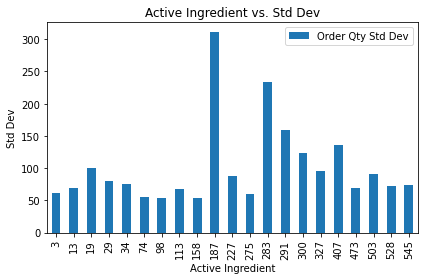

In [111]:
plt.figure(figsize=(12, 6))
std_dev_filtered.plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Std Dev')
plt.title('Active Ingredient vs. Std Dev')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

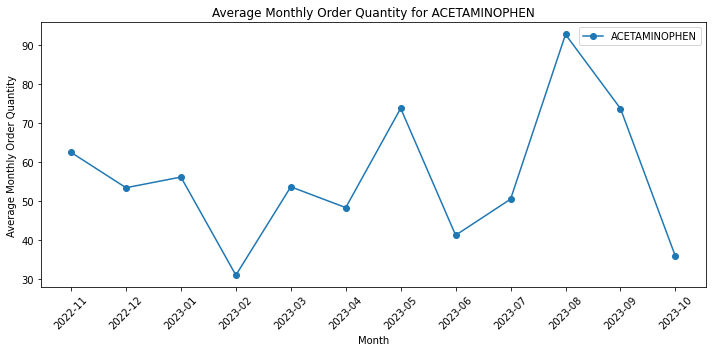

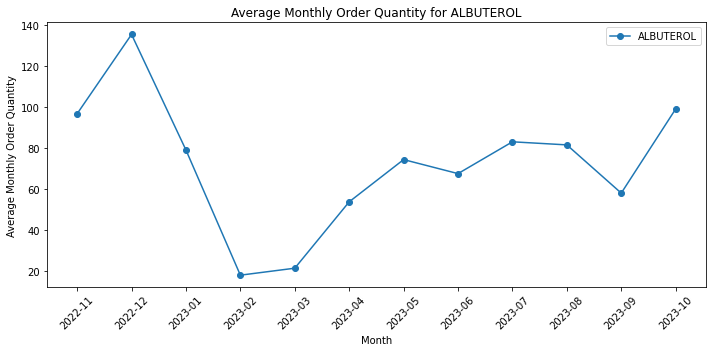

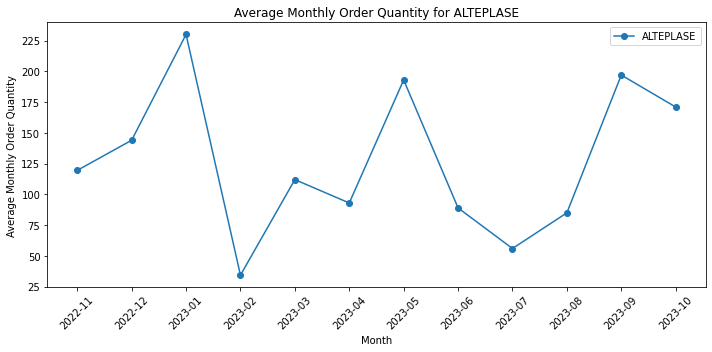

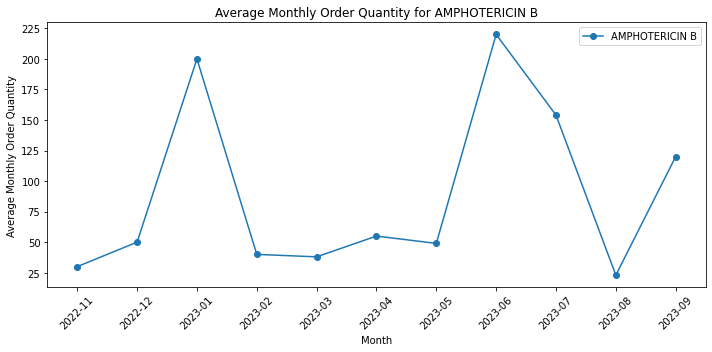

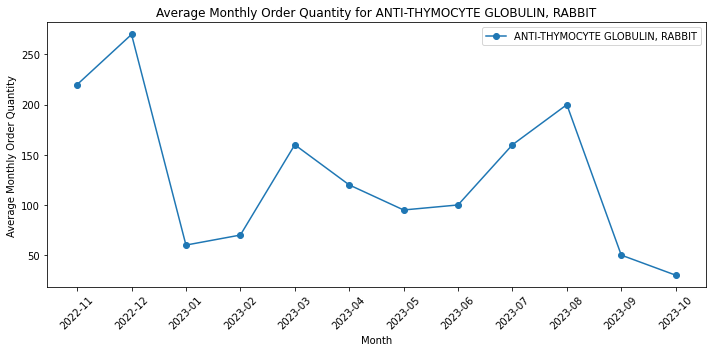

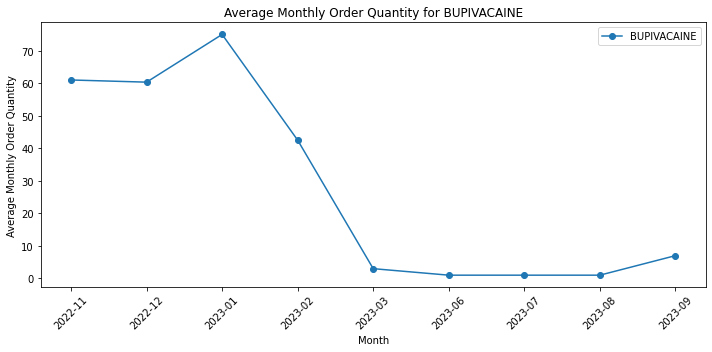

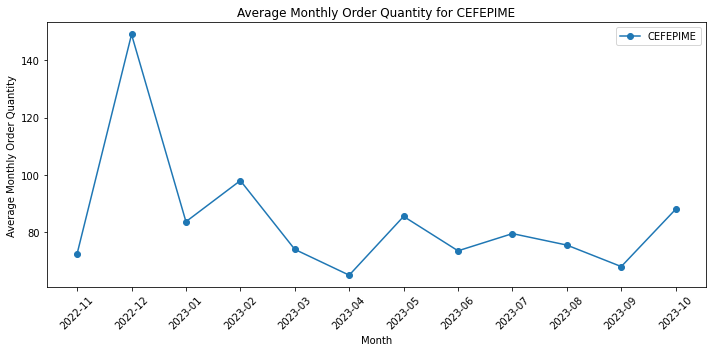

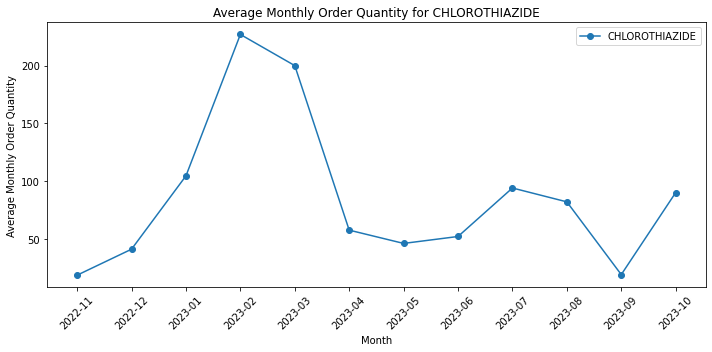

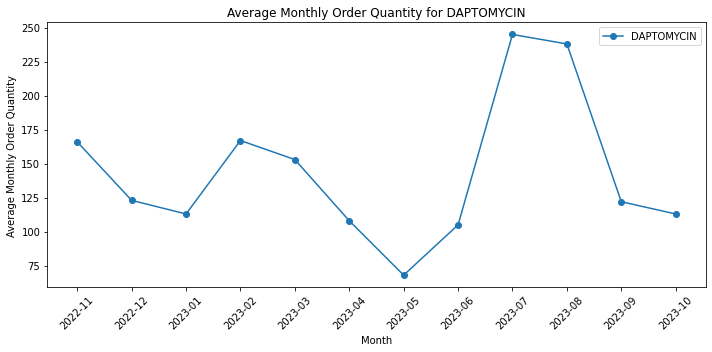

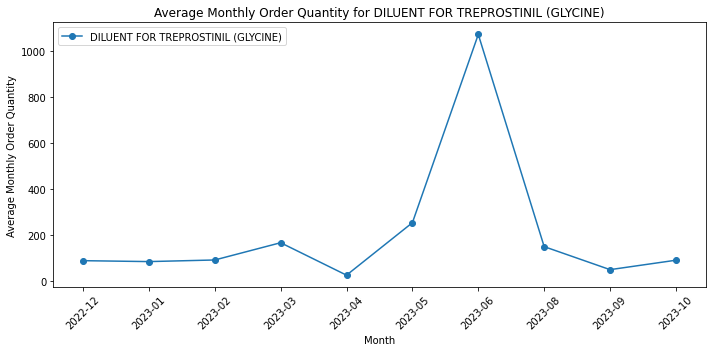

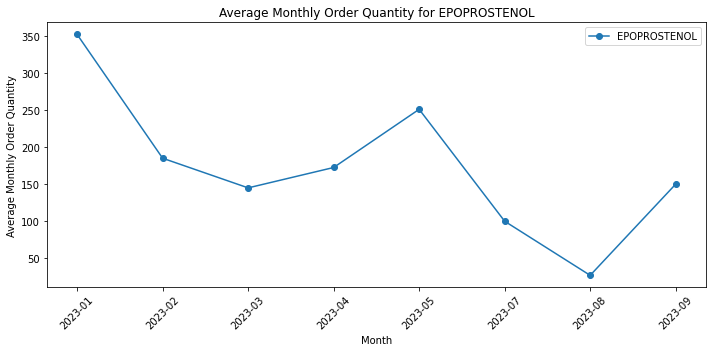

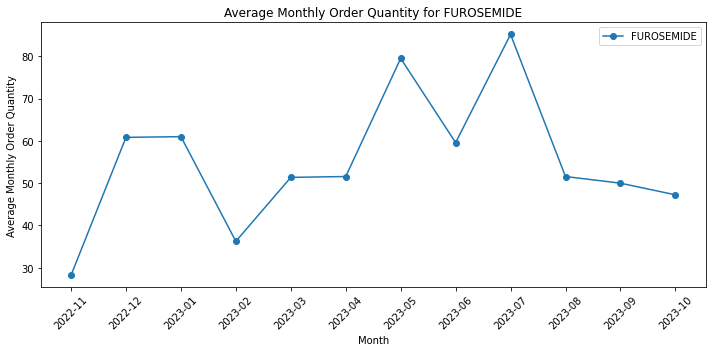

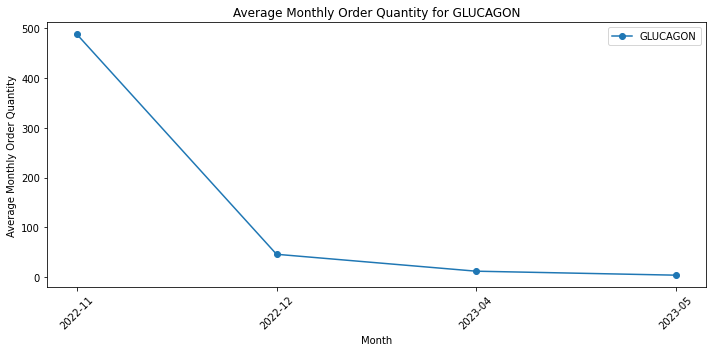

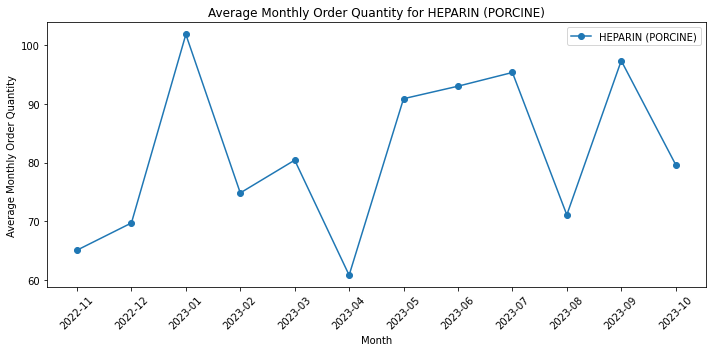

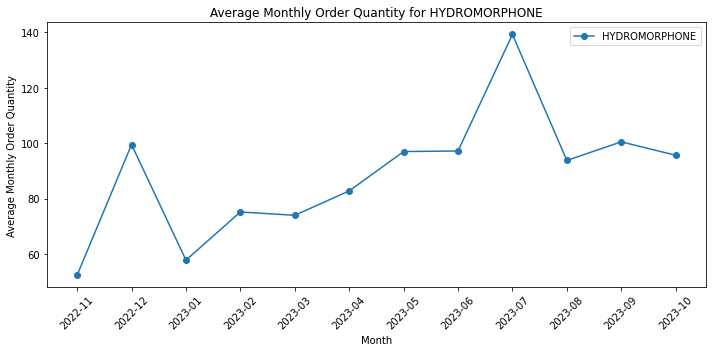

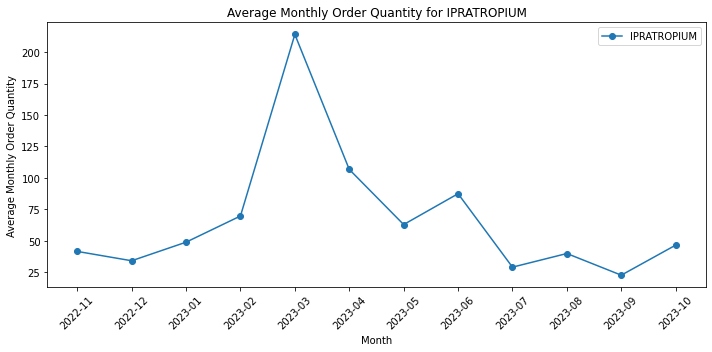

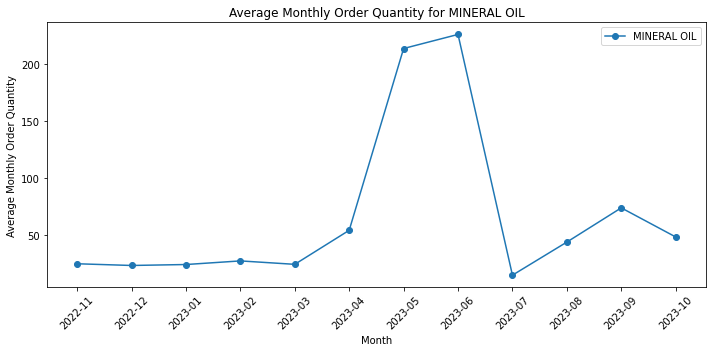

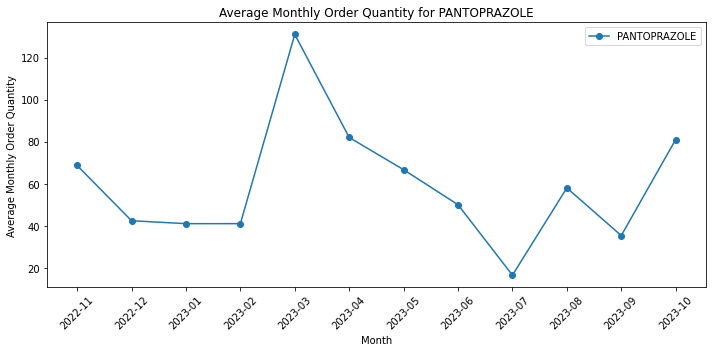

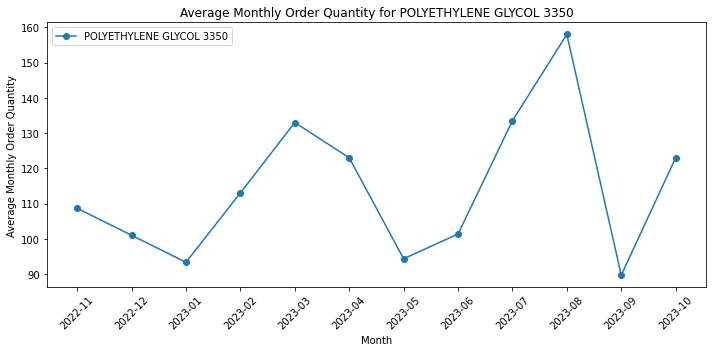

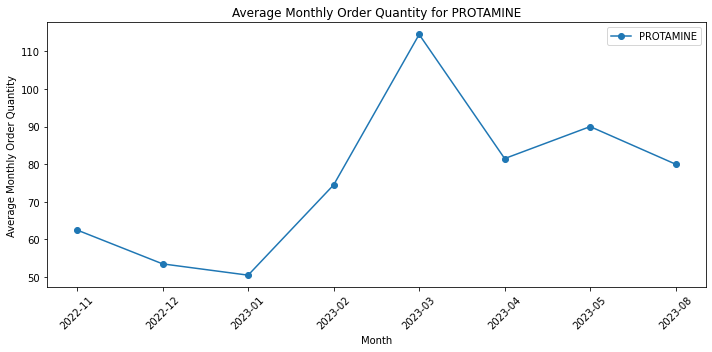

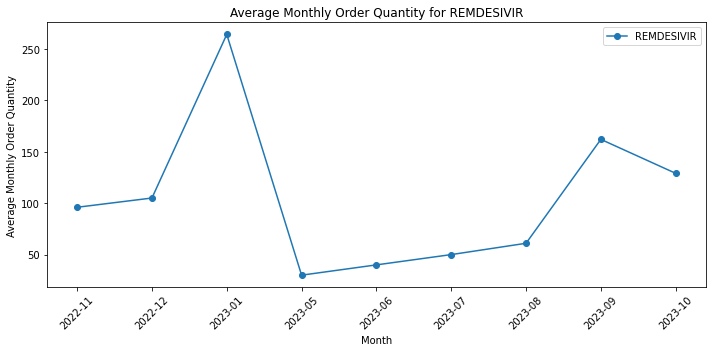

In [112]:
# Plotting one graph per primary ingredient with std dev >= 10
for ingredient in filtered_ingredients:
    # Filter data for the current ingredient
    ingredient_data = filtered_average_orders[filtered_average_orders['Primary Ingredient HIC4 Desc'] == ingredient]
    
    # Pivot the data for plotting
    pivot_ingredient_data = ingredient_data.pivot(index='Month', columns='Primary Ingredient HIC4 Desc', values='Order Qty')
    
    # Plot the data
    plt.figure(figsize=(10, 5))
    plt.plot(pivot_ingredient_data.index, pivot_ingredient_data[ingredient], marker='o', label=ingredient)
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Order Quantity')
    plt.title(f'Average Monthly Order Quantity for {ingredient}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()





#### Trying to identify fast movers (drugs)

In [113]:
# Convert 'Invoice Date' to datetime format and set as index
filtered_data['Invoice Date'] = pd.to_datetime(filtered_data['Invoice Date'])
filtered_data.set_index('Invoice Date', inplace=True)

# Drop the 'Primary Ingredient HIC4 Desc' column
filtered_data.drop('Primary Ingredient HIC4 Desc', axis=1, inplace=True)

# Resample by week and sum the 'Order Qty' for each product description
weekly_sum = filtered_data.groupby('Product Description').resample('W').sum()

# Reset the index to flatten the dataframe and make 'Product Description' a column again
weekly_sum.reset_index(inplace=True)

# Add a column representing the week number of the year
weekly_sum['Week Number'] = weekly_sum['Invoice Date'].dt.isocalendar().week

# Display the results
weekly_sum





/var/folders/1q/j6g9lj1x5gz1fvb0sstc6rnm0000gn/T/ipykernel_92589/3976976271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Invoice Date'] = pd.to_datetime(filtered_data['Invoice Date'])
/var/folders/1q/j6g9lj1x5gz1fvb0sstc6rnm0000gn/T/ipykernel_92589/3976976271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop('Primary Ingredient HIC4 Desc', axis=1, inplace=True)


,Product Description,Invoice Date,Order Qty,Week Number
0,ABACAVIR 300 MG TAB 30 UD AHP,2023-01-01,1,52
1,ABACAVIR 300 MG TAB 30 UD AHP,2023-01-08,0,1
2,ABACAVIR 300 MG TAB 30 UD AHP,2023-01-15,0,2
3,ABACAVIR 300 MG TAB 30 UD AHP,2023-01-22,1,3
4,ABACAVIR 300 MG TAB 30 UD AHP,2023-01-29,0,4
...,...,...,...,...
51686,ZYPREXA IM 10 MG SDV,2023-08-06,80,31
51687,ZYPREXA IM 10 MG SDV,2023-08-13,0,32
51688,ZYPREXA IM 10 MG SDV,2023-08-20,0,33
51689,ZYPREXA IM 10 MG SDV,2023-08-27,20,34


In [114]:
# Calculate the average weekly order quantity for each product description
average_weekly_orders = weekly_sum.groupby('Product Description')['Order Qty'].mean().reset_index()

# Rename the column to reflect that it's an average
average_weekly_orders.rename(columns={'Order Qty': 'Average Weekly Order Qty'}, inplace=True)

# Display the results
average_weekly_orders






,Product Description,Average Weekly Order Qty
0,ABACAVIR 300 MG TAB 30 UD AHP,0.232558
1,ABILIFY MAINT 300 MG KIT 1,0.136364
2,ABILIFY MAINT 400 MG KIT 1,0.400000
3,ACAMPROSATE CAL 333 MG DR TAB 30 UD AHP,1.250000
4,ACAMPROSATE CALC 333 MG DR TAB 180,1.000000
...,...,...
1971,ZOLPIDEM TART 5 MG TAB 100 UD AHP,1.000000
1972,ZONEGRAN 100MG CAP 100,1.000000
1973,ZONISAMIDE 100 MG CAP 100 (10X10) UD AHP,0.222222
1974,ZONISAMIDE 25 MG CAP 100,1.000000


<Figure size 24000x12000 with 0 Axes>

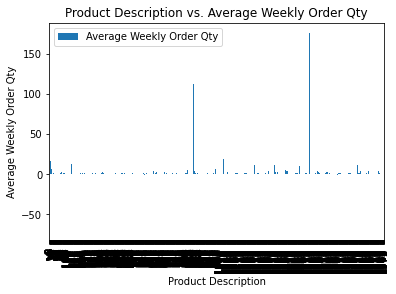

In [115]:
plt.figure(figsize=(120, 60), dpi=200)
average_weekly_orders.plot(kind='bar')
plt.xlabel('Product Description')
plt.ylabel('Average Weekly Order Qty')
plt.title('Product Description vs. Average Weekly Order Qty')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

In [116]:
max_order_qty = np.ceil(average_weekly_orders['Average Weekly Order Qty'].max())
bins = np.arange(0, max_order_qty + 1, 1)

# Use cut to categorize each product description into bins
average_weekly_orders['Order Qty Range'] = pd.cut(average_weekly_orders['Average Weekly Order Qty'], bins=bins, include_lowest=True, right=False)

# Count the number of product descriptions in each bin
order_qty_range_counts = average_weekly_orders['Order Qty Range'].value_counts().sort_index().reset_index()

# Rename columns for clarity
order_qty_range_counts.columns = ['Order Qty Range', 'Product Description Count']

order_qty_range_counts





,Order Qty Range,Product Description Count
0,"[0.0, 1.0)",902
1,"[1.0, 2.0)",495
2,"[2.0, 3.0)",178
3,"[3.0, 4.0)",86
4,"[4.0, 5.0)",51
...,...,...
171,"[171.0, 172.0)",0
172,"[172.0, 173.0)",0
173,"[173.0, 174.0)",0
174,"[174.0, 175.0)",0


In [117]:
# Create bins with steps of 0.25 starting from 0 up to the maximum average weekly order qty
bins_fine = np.arange(0, max_order_qty + 0.25, 0.25)

# Use cut to categorize each product description into finer bins
average_weekly_orders['Order Qty Range Fine'] = pd.cut(average_weekly_orders['Average Weekly Order Qty'], bins=bins_fine, include_lowest=True, right=False)

# Count the number of product descriptions in each finer bin
order_qty_range_fine_counts = average_weekly_orders['Order Qty Range Fine'].value_counts().sort_index().reset_index()

# Rename columns for clarity
order_qty_range_fine_counts.columns = ['Order Qty Range Fine', 'Product Description Count']

order_qty_range_fine_counts





,Order Qty Range Fine,Product Description Count
0,"[0.0, 0.25)",326
1,"[0.25, 0.5)",297
2,"[0.5, 0.75)",183
3,"[0.75, 1.0)",96
4,"[1.0, 1.25)",337
...,...,...
699,"[174.75, 175.0)",0
700,"[175.0, 175.25)",0
701,"[175.25, 175.5)",0
702,"[175.5, 175.75)",0


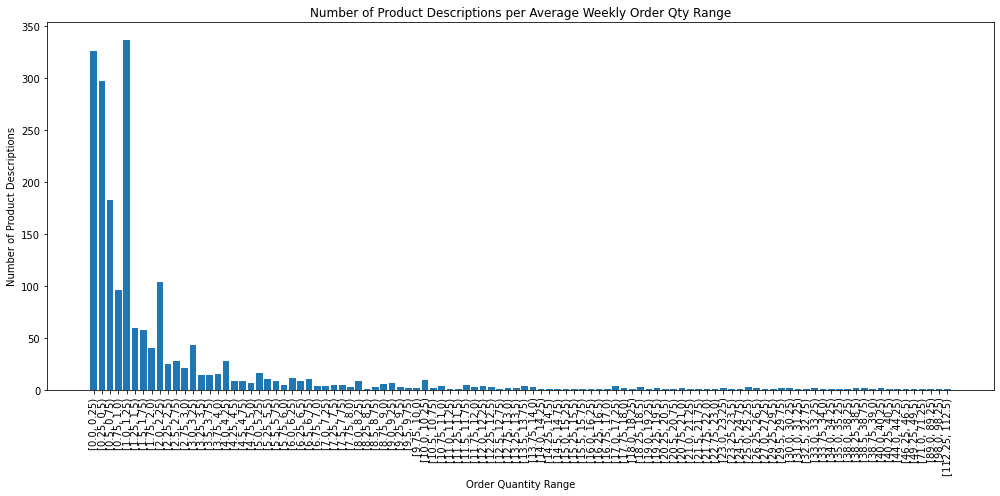

In [119]:


# Filter out the bins with zero product descriptions
order_qty_range_fine_counts_nonzero = order_qty_range_fine_counts[order_qty_range_fine_counts['Product Description Count'] > 0]

# Plot the results
plt.figure(figsize=(14, 7))
plt.bar(order_qty_range_fine_counts_nonzero['Order Qty Range Fine'].astype(str), order_qty_range_fine_counts_nonzero['Product Description Count'])
plt.xticks(rotation=90)  # Rotate x labels to avoid overlap
plt.xlabel('Order Quantity Range')
plt.ylabel('Number of Product Descriptions')
plt.title('Number of Product Descriptions per Average Weekly Order Qty Range')
plt.tight_layout()  # Adjust layout to fit all x labels
plt.show()






In [120]:
# Calculate the overall average of the average weekly order quantities
overall_average = average_weekly_orders['Average Weekly Order Qty'].mean()
overall_average

2.630553889343627